In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [5]:
df = pd.read_excel(r"D:\Jupyter\Data Science\ML\SUPERVISIED LEARNING\CLASSIFICATION\projects\cleandiabetic.xlsx")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66,23,4.546836,28.1,0.408656,2.140695,0
1,0,137,40,35,5.517848,43.1,1.512614,2.396782,1
2,3,78,50,32,4.447960,31.0,0.497996,2.258101,1
3,2,197,70,45,8.158305,30.5,0.397492,2.698168,1
4,1,189,60,23,9.457800,30.1,0.630872,2.771488,1


In [6]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

**scaling**

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
X_train

array([[ 0.79010212, -0.00734687,  0.06869789, ...,  0.03470905,
         0.74983924,  0.43681258],
       [-0.42514094, -0.71988941, -1.02996684, ..., -1.62799384,
        -1.3300749 , -0.99018658],
       [ 1.39772365,  1.7092329 ,  1.48126682, ...,  0.04879975,
        -0.02725028,  2.41359685],
       ...,
       [-0.72895171,  0.51086589, -0.71606264, ...,  1.03514892,
         0.19198884, -1.13369837],
       [-1.03276247,  0.15459462, -0.24520632, ..., -0.40210273,
         2.20368679, -0.58712344],
       [-0.42514094,  0.12220632, -1.97167947, ...,  0.14743467,
        -1.21393373, -0.99018658]])

In [17]:
X_test

array([[-4.25140944e-01,  1.86982918e-01,  2.25649990e-01,
        -3.12331745e-01,  6.19109988e-01, -2.16537631e-02,
         3.56802122e-01, -5.87123443e-01],
       [ 1.82480588e-01, -6.55112814e-01, -8.73014740e-01,
         3.47570717e-01,  5.15981962e-01, -1.31799839e+00,
         1.31967481e+00,  3.33915609e-01],
       [-1.03276247e+00,  2.42177544e+00, -4.02158427e-01,
         2.53298937e-01,  1.10385748e+00,  1.11969313e+00,
         8.58435919e-02, -2.18861660e-01],
       [ 4.86291353e-01,  2.06550417e+00,  3.82602094e-01,
        -2.18059964e-01,  6.34585362e-01,  1.44377929e+00,
         1.47261399e+00,  2.06113817e+00],
       [ 1.82480588e-01, -2.34064948e-01,  6.86978859e-02,
        -1.63213667e+00, -5.67318106e-01, -1.58572173e+00,
        -4.04413977e-02,  7.32467250e-01],
       [-4.25140944e-01,  7.37583974e-01, -8.82542184e-02,
         8.18929618e-01,  1.60481829e+00, -7.54370289e-01,
        -4.89855780e-01, -1.02700586e-01],
       [-7.28951709e-01,  1.320573

In [18]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

ypred_train = log_reg.predict(X_train)

# train accuarcy
from sklearn.metrics import accuracy_score
print('train accuracy',accuracy_score(y_train,ypred_train))

# crossvalidation score
from sklearn.model_selection import cross_val_score
print('cvscore',cross_val_score(log_reg,X_train,y_train,cv=5,scoring ='accuracy').mean())

ypred_test = log_reg.predict(X_test)
print('testaccuracy',accuracy_score(y_test,ypred_test))


train accuracy 0.7955271565495208
cvscore 0.7856118791602663
testaccuracy 0.759493670886076


In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred_test)
cm

array([[48,  9],
       [10, 12]], dtype=int64)

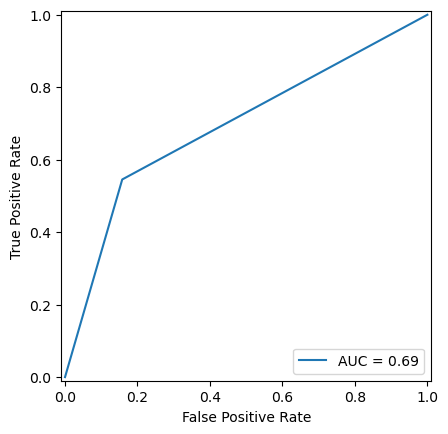

In [20]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

fpr,tpr,thresholds = roc_curve(y_test,ypred_test)
roc_auc = auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,ypred_test)

0.69377990430622